In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from constants import INF, SPATIAL, MORPHOLOGICAL, TEMPORAL 

In [2]:
PATH = 'clustersData/0'

In [3]:
df = None
files = os.listdir(PATH)
for file in sorted(files):
    if df is None:
        df = pd.read_csv(PATH + '/' + file)
        df['file'] = file
    else:
        temp = pd.read_csv(PATH + '/' + file)
        temp['file'] = file
        df = df.append(temp)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 0 to 0
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dep_red                   1063 non-null   float64
 1   dep_sd                    1063 non-null   float64
 2   hyp_red                   1063 non-null   float64
 3   hyp_sd                    1063 non-null   float64
 4   graph_avg_speed           1063 non-null   float64
 5   graph_slowest_path        1063 non-null   float64
 6   graph_fastest_path        1063 non-null   float64
 7   geometrical_avg_shift     1063 non-null   float64
 8   geometrical_shift_sd      1063 non-null   float64
 9   geometrical_max_dist      1063 non-null   float64
 10  spatial_dispersion_count  1063 non-null   float64
 11  spatial_dispersion_sd     1063 non-null   float64
 12  da                        1063 non-null   float64
 13  da_sd                     1063 non-null   float64
 14  Channels co

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.head()

,dep_red,dep_sd,hyp_red,hyp_sd,graph_avg_speed,graph_slowest_path,graph_fastest_path,geometrical_avg_shift,geometrical_shift_sd,geometrical_max_dist,spatial_dispersion_count,spatial_dispersion_sd,da,da_sd,Channels contrast,break_measure,fwhm,get_acc,max_speed,peak2peak,trough2peak,rise_coef,smile_cry,d_kl,jump,psd_center,der_psd_center,rise_time,unif_dist,label,file
0,8.500000,1.500000,0.0,0.0,10.453978,7.310571,13.597385,0.210550,0.189968,32.067699,2.0,0.280689,936.0,1.466900,0.0,-331.844968,36.0,14.250416,35.0,734.301418,80.0,59.0,-11.477378,0.376905,502.096897,11.360348,6.023163,243.0,-0.096432,-1.0,es04feb12_1_1_2.csv
0,118.833333,7.581044,0.0,0.0,9.709672,5.024938,29.643920,0.322637,0.357573,55.909833,1.0,0.238903,290.0,0.849948,0.0,-1008.448141,36.0,86.991241,37.0,1454.894065,56.0,43.0,-13.845540,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-1.0,es04feb12_1_2_10.csv
0,18.000000,3.000000,0.0,0.0,5.335937,5.335937,5.335937,0.147703,0.081159,19.807425,1.0,0.294090,598.0,1.169164,0.0,-1443.647863,51.0,59.464278,68.0,1627.022787,116.0,115.0,-21.964323,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-1.0,es04feb12_1_2_11.csv
0,42.750000,3.897114,0.0,0.0,5.806389,3.507960,13.911205,0.297216,0.131546,44.090415,1.0,0.283303,918.0,1.436056,0.0,-751.235046,34.0,34.902512,28.0,916.768223,117.0,53.0,-8.240933,0.148997,106.967168,86.035406,126.522112,91.0,0.164513,1.0,es04feb12_1_2_12.csv
0,49.666667,4.189935,0.0,0.0,7.091690,4.019950,17.255119,0.240036,0.049028,46.748573,1.0,0.298570,1028.0,1.450329,0.0,-1854.952889,39.0,48.542376,64.0,2123.447813,116.0,116.0,-14.980838,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,1.0,es04feb12_1_2_13.csv


In [6]:
df.describe()

,dep_red,dep_sd,hyp_red,hyp_sd,graph_avg_speed,graph_slowest_path,graph_fastest_path,geometrical_avg_shift,geometrical_shift_sd,geometrical_max_dist,spatial_dispersion_count,spatial_dispersion_sd,da,da_sd,Channels contrast,break_measure,fwhm,get_acc,max_speed,peak2peak,trough2peak,rise_coef,smile_cry,d_kl,jump,psd_center,der_psd_center,rise_time,unif_dist,label
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,338.935428,5.317128,262.083747,2.247952,13.686471,6.972371,41.859990,0.424218,0.466628,60.383437,2.408278,0.303572,1012.539981,1.172401,4.306359,-1587.290323,35.454374,22.312335,35.906867,1804.852140,101.970837,58.364064,-12.638146,-4308.002467,-4107.601209,-4273.915151,-4285.344372,-4228.856068,-4308.085716,-0.113829
std,1965.634586,11.454600,1604.225386,10.987618,11.438143,6.730194,40.743690,0.272574,0.900583,28.946683,1.332205,0.039543,529.668999,0.211951,34.493599,1123.965410,11.594106,616.974687,19.854930,1074.638633,28.660985,23.139308,12.965787,4953.906699,5129.533650,4983.691253,4973.706577,5023.015955,4953.834233,0.956309
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048437,0.011365,5.133113,1.000000,0.156309,124.000000,0.517692,0.000000,-7511.872638,15.000000,-9999.000000,0.000000,16.824444,10.000000,0.000000,-84.177516,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-3.000000
25%,5.000000,1.575119,0.000000,0.000000,5.882844,3.222222,10.986814,0.261424,0.153629,39.824141,1.000000,0.279370,696.000000,1.058399,0.000000,-2158.791261,30.000000,40.702077,22.000000,1102.444308,100.000000,43.000000,-17.380732,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-1.000000
50%,18.000000,2.943920,0.000000,0.000000,10.965856,5.257435,30.263634,0.386672,0.251026,56.913187,2.000000,0.303103,902.000000,1.200967,0.000000,-1346.885163,34.000000,57.089681,30.000000,1588.715455,117.000000,52.000000,-12.210957,0.136465,194.631854,16.763409,6.280611,71.000000,-0.063626,-1.000000
75%,47.757143,4.886953,0.000000,0.000000,19.284580,8.749603,58.700627,0.511397,0.390990,75.121572,3.000000,0.326772,1182.000000,1.315380,0.000000,-805.971031,38.000000,79.113530,44.000000,2306.117919,117.000000,69.000000,-8.031441,0.208300,339.933126,56.403749,38.069920,133.500000,0.106088,1.000000
max,30386.714286,104.404042,21540.428571,89.709562,82.275789,42.059482,262.164746,2.495086,8.669684,141.566239,8.000000,0.421263,3256.000000,1.666536,541.596859,476.111022,131.000000,196.104579,114.000000,6832.274229,182.000000,117.000000,107.086444,0.762679,743.055806,364.901247,364.811100,367.000000,0.298575,1.000000


In [7]:
df = df.loc[df.label >= 0]
df = df.loc[df.d_kl != -INF]

In [10]:
df.describe()

,dep_red,dep_sd,hyp_red,hyp_sd,graph_avg_speed,graph_slowest_path,graph_fastest_path,geometrical_avg_shift,geometrical_shift_sd,geometrical_max_dist,spatial_dispersion_count,spatial_dispersion_sd,da,da_sd,Channels contrast,break_measure,fwhm,get_acc,max_speed,peak2peak,trough2peak,rise_coef,smile_cry,d_kl,jump,psd_center,der_psd_center,rise_time,unif_dist,label
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,185.435926,3.772222,111.282328,1.189566,17.104489,8.992057,49.286685,0.427447,0.419085,59.316736,2.290960,0.301647,946.621469,1.153469,1.500257,-1703.724557,33.751412,10.099906,35.661017,1905.952322,96.149718,57.175141,-12.613340,0.208048,353.514734,63.238275,41.904532,126.483051,0.101002,0.717514
std,1245.080168,8.777317,887.040333,7.618962,12.755454,8.148334,45.698455,0.263772,0.703801,27.393460,1.260684,0.040216,486.812443,0.213597,10.538976,1085.469104,10.429600,755.965351,19.749086,1055.497897,32.538191,24.019417,10.769084,0.075681,150.987634,45.021020,37.701713,54.439415,0.099507,0.450846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049673,0.011365,6.165693,1.000000,0.163408,130.000000,0.562012,0.000000,-6481.113314,18.000000,-9999.000000,7.000000,20.336177,10.000000,0.000000,-77.572713,0.077713,89.766780,7.442545,3.534918,49.000000,-0.228416,0.000000
25%,3.333333,1.305941,0.000000,0.000000,7.608492,3.980278,13.683614,0.258667,0.153936,39.240285,1.000000,0.275024,646.000000,1.035392,0.000000,-2251.894864,29.000000,46.391372,22.000000,1228.299834,61.000000,39.000000,-17.603038,0.148758,241.393887,25.695553,10.907249,80.000000,0.034133,0.000000
50%,10.500000,2.061553,0.000000,0.000000,13.945362,6.613143,35.066124,0.400063,0.281838,57.799932,2.000000,0.297970,856.000000,1.173319,0.000000,-1460.752297,33.000000,63.991617,28.500000,1710.836307,116.500000,52.000000,-11.747204,0.194184,318.312203,53.265132,36.379167,118.500000,0.107940,1.000000
75%,26.550000,3.559026,0.000000,0.000000,25.416443,11.678351,74.977375,0.529044,0.404082,74.041119,3.000000,0.327205,1151.500000,1.291475,0.000000,-969.963550,37.000000,87.510054,43.000000,2400.444443,117.000000,68.000000,-6.973361,0.239361,434.462039,93.704004,62.108005,159.000000,0.185191,1.000000
max,13158.750000,89.502444,10848.125000,72.141246,62.859404,42.059482,237.539442,2.288561,7.206266,130.061096,8.000000,0.409985,3256.000000,1.643654,145.254381,242.645403,131.000000,144.122825,108.000000,6832.274229,182.000000,117.000000,17.596043,0.681195,743.055806,364.901247,364.811100,325.000000,0.295213,1.000000


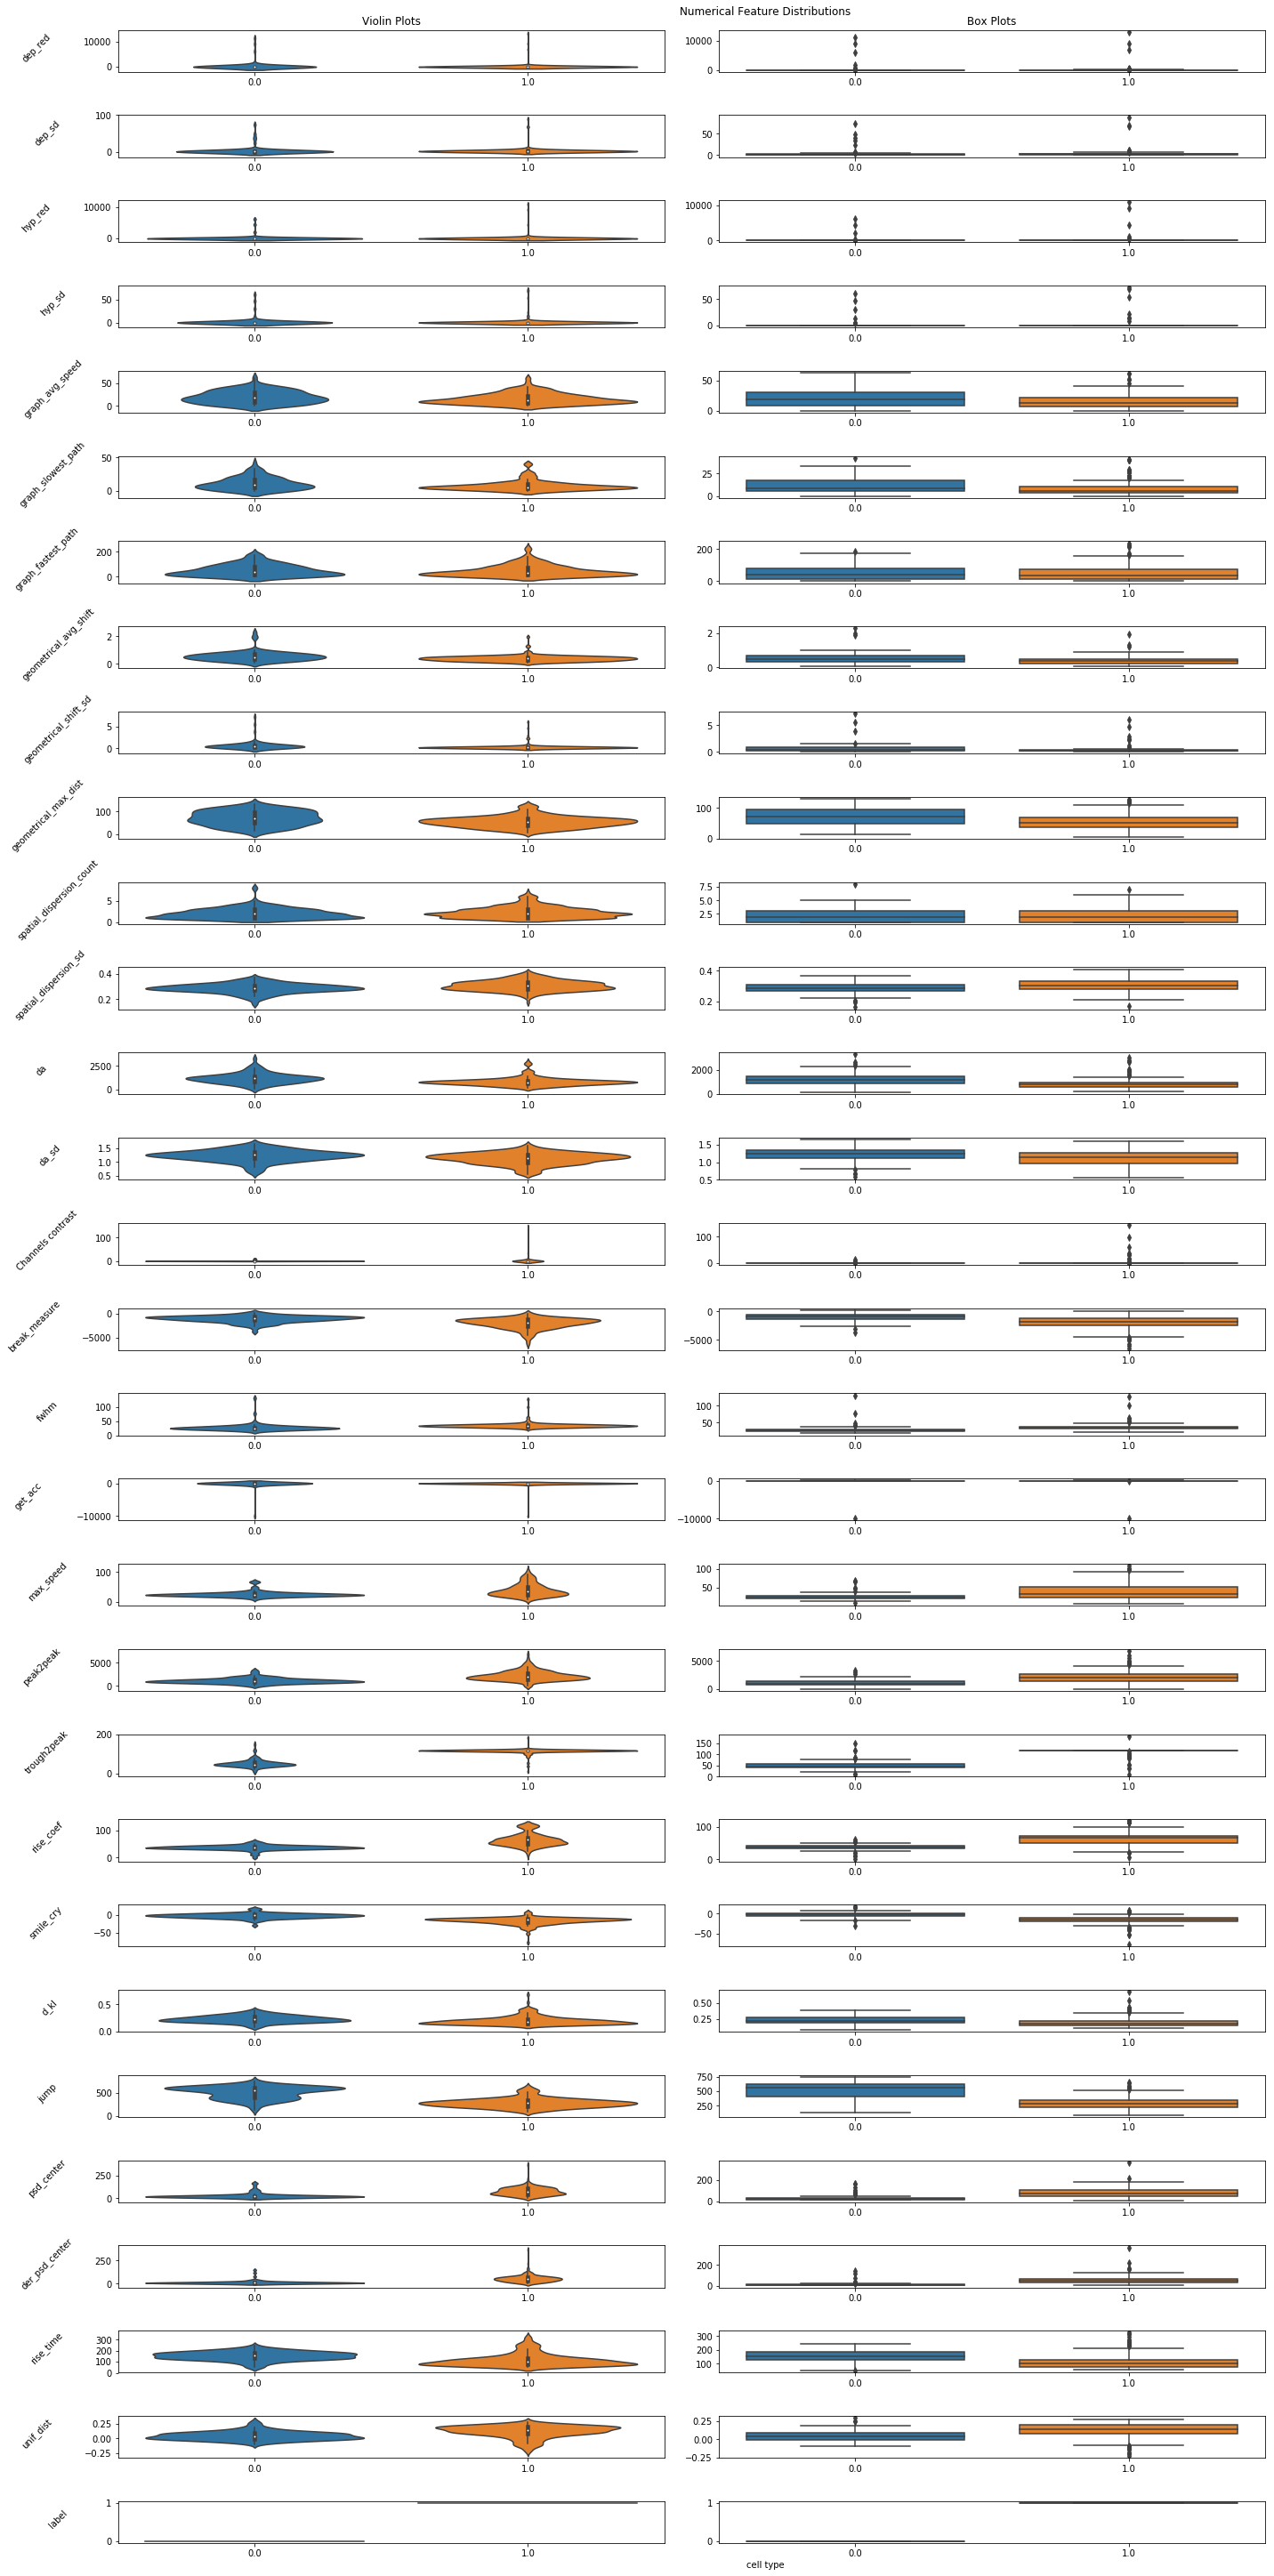

In [9]:
TARGET_COLUMN_NAME = 'label'
# Select all numerical features.
numerical_features = df.select_dtypes(["float64", "int64"])
plot_df = numerical_features.astype("float64")  # this is done to solve a problem in sns (see https://datascience.stackexchange.com/questions/55435/seaborn-violin-plot-error-no-loop-for-unfunc-add)

# Create distribution plots.
nrows = len(numerical_features.columns)
fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20, 40))
for i, feature in enumerate(numerical_features):
    sns.violinplot(x=TARGET_COLUMN_NAME, y=feature, data=plot_df, ax=ax[i, 0])
    if i == 0:
        ax[i, 0].set_title("Violin Plots")
        ax[i, 1].set_title("Box Plots")        
    sns.boxplot(x=TARGET_COLUMN_NAME, y=feature, data=plot_df, ax=ax[i, 1])
    ax[i, 0].set_xlabel("")
    ax[i, 1].set_xlabel("")
    ax[i, 1].set_ylabel("")
    ax[i, 0].set_ylabel(feature, rotation=45, labelpad=50)
_ = fig.text(0.6, 0, "cell type", ha='center')
_ = fig.suptitle("Numerical Feature Distributions", y=1, x=0.6)
fig.tight_layout()

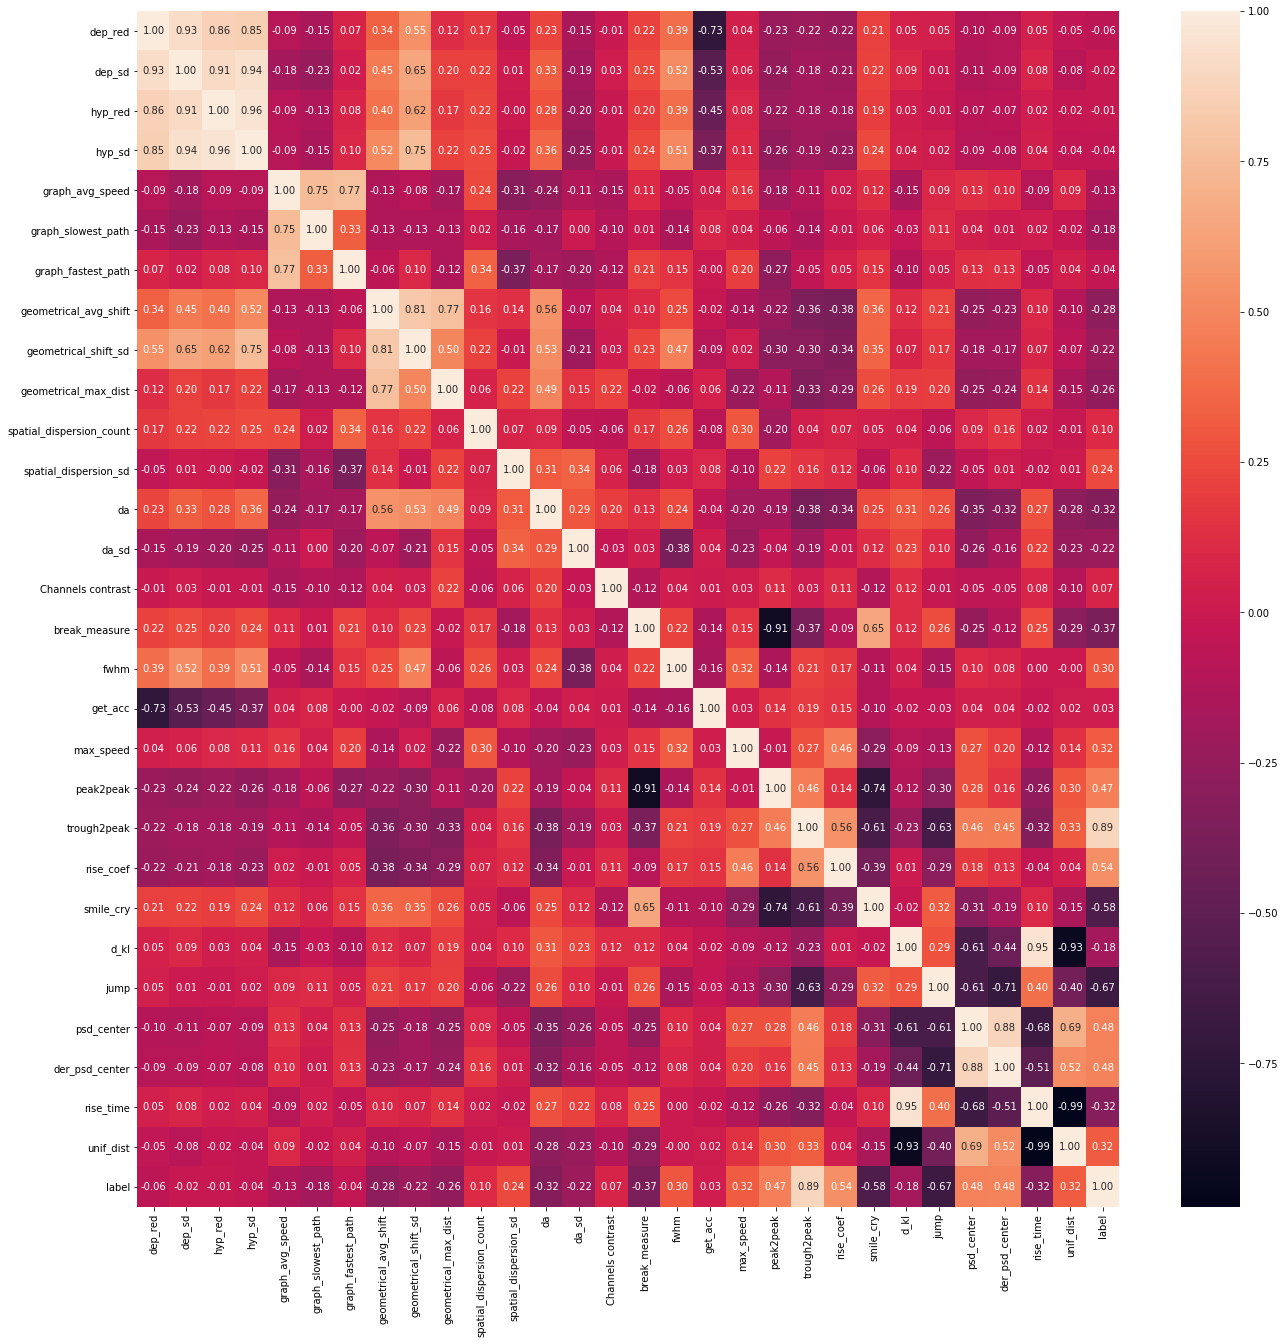

In [11]:
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(22, 22))
_ = sns.heatmap(correlation_matrix, annot=True, fmt='.2f')